In [85]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 3.9 MB/s 
     |████████████████████████████████| 181 kB 65.7 MB/s 
     |████████████████████████████████| 232 kB 58.4 MB/s 
     |████████████████████████████████| 111 kB 56.2 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 4.3 MB 40.6 MB/s 
     |████████████████████████████████| 164 kB 57.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 133 kB 68.9 MB/s 
     |████████████████████████████████| 423 kB 57.4 MB/s 
     |████████████████████████████████| 793 kB 51.3 MB/s 
     |████████████████████████████████| 132 kB 59.7 MB/s 
     |████████████████████████████████| 381 kB 58.0 MB/s 
     |████████████████████████████████| 51 kB 8.4 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=a9bdd099544

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import streamlit as st


import warnings
warnings.filterwarnings('ignore')

In [39]:
match_df = pd.read_csv("matches.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [40]:
dlvr_df = pd.read_csv("deliveries.csv")
dlvr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [41]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [42]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [43]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [44]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [45]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [46]:
match_df['winner'].fillna('Draw', inplace=True)

In [47]:
team_encoding = {
    'Mumbai Indians' : 1,
    'Kolkata Knight Riders' : 2,
    'Royal Challengers Bangalore' : 3,
    'Deccan Chargers' : 4,
    'Chennai Super Kings' : 5,
    'Rajasthan Royals' : 6,
    'Delhi Daredevils' : 7,
    'Gujarat Lions' : 8,
    'Kings XI Punjab' : 9,
    'Sunrisers Hyderabad' : 10,
    'Rising Pune Supergiant' : 11,
    'Rising Pune Supergiants' : 11,
    'Kochi Tuskers Kerala' : 12,
    'Pune Warriors' : 13,
    'Delhi Capitals' : 14,
    'Draw' : 15  
}

team_encode_dict = {
    'team1' : team_encoding,
    'team2'  : team_encoding,
    'toss_winner' : team_encoding,
    'winner' : team_encoding 
}
match_df.replace(team_encode_dict, inplace = True)
match_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
515,516,2014,Mumbai,2014-05-30,9,5,5,field,normal,0,9,24,0,V Sehwag,Wankhede Stadium,HDPK Dharmasena,RJ Tucker,NaN
546,547,2015,Chennai,2015-04-28,5,2,2,field,normal,0,5,2,0,DJ Bravo,"MA Chidambaram Stadium, Chepauk",RM Deshpande,VA Kulkarni,NaN
454,455,2013,Delhi,2013-05-22,10,6,10,bat,normal,0,6,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
17,18,2017,Delhi,2017-04-17,7,2,7,bat,normal,0,2,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
255,256,2011,Chandigarh,2011-04-21,9,6,6,field,normal,0,9,48,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",S Asnani,PR Reiffel,NaN
505,506,2014,Kolkata,2014-05-22,2,3,3,field,normal,0,2,30,0,RV Uthappa,Eden Gardens,AK Chaudhary,CK Nandan,NaN
531,532,2015,Pune,2015-04-18,9,2,2,field,normal,0,2,0,4,AD Russell,Maharashtra Cricket Association Stadium,SD Fry,CK Nandan,NaN
62,63,2008,Mumbai,2008-04-20,1,3,1,bat,normal,0,3,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
49,50,2017,Mumbai,2017-05-11,9,1,1,field,normal,0,9,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
510,511,2014,Kolkata,2014-05-24,10,2,2,field,normal,0,2,0,4,YK Pathan,Eden Gardens,RM Deshpande,BNJ Oxenford,NaN


In [48]:
#Missing values in city col
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [49]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [50]:
match_df[match_df['city'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [51]:
match_df['city'].fillna('Dubai' , inplace = True)

In [52]:
match_df.info()
match_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [53]:
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


In [54]:
toss_win = match_df['toss_winner'].value_counts(sort = True)
match_win = match_df['winner'].value_counts(sort = True)

for idx , val in toss_win.iteritems():
  print(f"{list(team_encode_dict['winner'].keys())[idx - 1]} -> {toss_win[idx]}")

Mumbai Indians -> 98
Kolkata Knight Riders -> 92
Chennai Super Kings -> 89
Royal Challengers Bangalore -> 81
Kings XI Punjab -> 81
Delhi Daredevils -> 80
Rajasthan Royals -> 80
Sunrisers Hyderabad -> 46
Deccan Chargers -> 43
Kochi Tuskers Kerala -> 20
Gujarat Lions -> 15
Rising Pune Supergiant -> 13
Pune Warriors -> 10
Rising Pune Supergiants -> 8


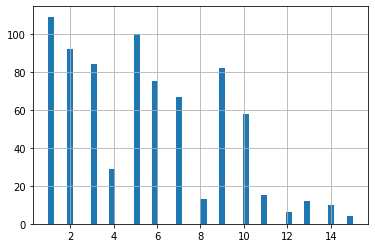

In [55]:
match_df['winner'].hist(bins = 50)
match_df = match_df.reset_index(drop=True)

Text(0.5, 1.0, 'Match Winners')

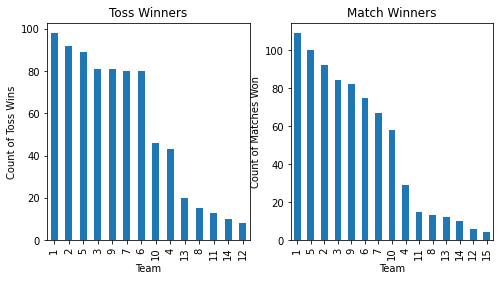

In [56]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of Toss Wins')
ax1.set_title('Toss Winners')
toss_win.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
match_win.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of Matches Won')
ax2.set_title('Match Winners')

In [57]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [58]:
match_df = match_df[['team1' , 'team2' , 'city' , 'toss_decision' , 'toss_winner' , 'venue' , 'winner']]
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3
...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1
753,10,14,Visakhapatnam,field,14,ACA-VDCA Stadium,14
754,14,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5


In [59]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city' , 'toss_decision' , 'venue']
encoder = LabelEncoder()
for ftr in ftr_list:
  match_df[ftr] = encoder.fit_transform(match_df[ftr])
  print(encoder.classes_)

match_df
 

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,14,32,1,14,0,14
754,14,5,32,1,5,0,5


In [60]:
from sklearn.model_selection import train_test_split

train_df , test_df = train_test_split(match_df , test_size = 0.2 , random_state = 5)

print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_scores(model, data, predictor, target):
  model.fit(data[predictor], data[target])
  prediction = model.predict(data[predictor])
  accuracy = accuracy_score(prediction, data[target])
  print('Accuracy: %s' % '{0:2}' .format(accuracy))
  scores = cross_val_score(model , data[predictor] , data[target], scoring = "neg_mean_squared_error" , cv = 5)
  
  print('Cross-Validation Scores: {}' .format(np.sqrt(-scores)))
  print(f'Average RMSE: {np.sqrt(-scores).mean()}')



In [83]:
target_var = ['winner']
predictor_var = ['team1' , 'team2' , 'venue' , 'toss_winner' , 'city' , 'toss_decision']

model = LogisticRegression()                                      

print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.3211920529801324
Cross-Validation Scores: [3.60211141 3.74165739 3.45932683 3.33526115 3.63776488]
Average RMSE: 3.555224332732571


In [81]:
model = RandomForestClassifier (n_estimators=250)
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.8890728476821192
Cross-Validation Scores: [3.82466981 3.75598696 3.40636254 3.59407225 3.7438839 ]
Average RMSE: 3.664995093868302


In [64]:
team1 = 'Kolkata Knight Riders'
    
team2 = 'Mumbai Indians' 

toss_winner = 'Mumbai Indians'

inp = [team_encode_dict['team1'][team1] , team_encode_dict['team2'][team2] , '14' , team_encode_dict['toss_winner'][toss_winner] , '2' , '1']

print(inp)

inp = np.array(inp).reshape((1, -1))

print(inp)

output = model.predict(inp)

print(output)

#print(f"The Winner Would be : {list(team_encoding.keys()) [list(team_encode_dict['team1'].values()).index(output)]}")
#st.write(f"The Winner Would be : {list(team_encoding.keys()) [list(team_encode_dict['team1'].values()).index(output)]}")





[2, 1, '14', 1, '2', '1']
[['2' '1' '14' '1' '2' '1']]
[1]


In [84]:
Teams = 'Mumbai Indians' ,'Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings','Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Sunrisers Hyderabad' ,'Rising Pune Supergiant','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals'
from sklearn.metrics import mean_squared_error
print(team_encoding)

team1 = input('Enter any team From Above for team 1:')

team2 = input('Enter any team From Above for team 2:')

toss_winner = input('Select the toss winner amongst the two:')

inp = [team_encode_dict['team1'][team1] , team_encode_dict['team2'][team2] , '14' , team_encode_dict['toss_winner'][toss_winner] , '2' , '1']

print(inp)

inp = np.array(inp).reshape((1, -1))

print(inp)

output = model.predict(inp)



for key, value in team_encoding.items(): 
  if value == output:
    f = key
    break
print('The most probable team winning the match is :',f)



{'Mumbai Indians': 1, 'Kolkata Knight Riders': 2, 'Royal Challengers Bangalore': 3, 'Deccan Chargers': 4, 'Chennai Super Kings': 5, 'Rajasthan Royals': 6, 'Delhi Daredevils': 7, 'Gujarat Lions': 8, 'Kings XI Punjab': 9, 'Sunrisers Hyderabad': 10, 'Rising Pune Supergiant': 11, 'Rising Pune Supergiants': 11, 'Kochi Tuskers Kerala': 12, 'Pune Warriors': 13, 'Delhi Capitals': 14, 'Draw': 15}
Enter any team From Above for team 1:Royal Challengers Bangalore
Enter any team From Above for team 2:Kolkata Knight Riders
Select the toss winner amongst the two:Kolkata Knight Riders
[3, 2, '14', 2, '2', '1']
[['3' '2' '14' '2' '2' '1']]
The most probable team winning the match is : Royal Challengers Bangalore


ValueError: ignored